In [15]:
# USAGE
# python cat_detector.py --image images/cat_01.jpg

# import the necessary packages
import argparse
import cv2
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
import IPython.display as disp
%matplotlib inline

In [38]:
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", default="images/cat_04.jpg", help="path to the input image")
ap.add_argument("-c", "--cascade", default="haarcascade_frontalcatface.xml", help="path to cat detector haar cascade")
ap.add_argument('strings', metavar='STRING', nargs='*', help='String for searching',)
ap.add_argument('-f','--file',help='Path for input file. First line should contain number of lines to search in')
args = vars(ap.parse_args("-i images/cat_04.jpg"))

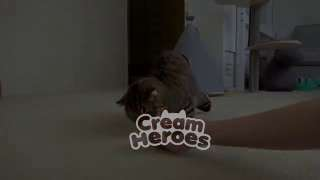

(360, 640, 3)


KeyboardInterrupt: 

In [49]:
# load the cat detector Haar cascade, then detect cat faces in the input image
detector = cv2.CascadeClassifier(args["cascade"])

def vidshow(img, maxSize=(320,240), format='jpg', compressPercent=0.6):
    disp.clear_output(wait=True)
    imgw = float(img.shape[1])
    imgh = float(img.shape[0])
    if imgw > maxSize[0] or imgh > maxSize[1]:
        scale = min(maxSize[0]/imgw, maxSize[1]/imgh)
        img = cv2.resize(img, dsize=(0,0), fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), int(compressPercent*100)]
    ret, png = cv2.imencode('.'+format, img, encode_param)
    decoded = disp.Image(data=png, format=format)
    disp.display(decoded)

if __name__ == '__main__':
    print("reading file")
    cap = cv2.VideoCapture("바보 루루.mp4")
    while cap.isOpened():
        ret, frame = cap.read()
        ret, frame = cap.read()
        ret, frame = cap.read()
        ret, frame = cap.read()
        ret, frame = cap.read()

        print(frame.shape)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray = cv2.equalizeHist(gray)
        rects = detector.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(50, 50))
        for (i, (x, y, w, h)) in enumerate(rects):
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.putText(frame, "Cat #{}".format(i + 1), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)
        #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        vidshow(frame)
        time.sleep(0.03)

In [ ]:
# load the input image and convert it to grayscale
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# load the cat detector Haar cascade, then detect cat faces in the input image
detector = cv2.CascadeClassifier(args["cascade"])
rects = detector.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=10, minSize=(75, 75))

# loop over the cat faces and draw a rectangle surrounding each
for (i, (x, y, w, h)) in enumerate(rects):
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.putText(image, "Cat #{}".format(i + 1), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)
#write the image
cv2.imwrite('result.jpg', image)
# show the detected cat faces
plt.imshow(image)